# A Third-party Analysis of the AASL Standards

Jinren Yuan

This section contains the analysis of **stakeholders**, combining the groups of administrators and collaborators.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Load the data of collaborators
df_c = pd.read_csv("data/AASL Standards Survey - Collaborators - Sheet.csv")
df_c.shape

(43, 149)

In [3]:
# Load the data of administrators
df_a = pd.read_csv("data/AASL Standards Survey - Administrators - Sheet.csv")
df_a.shape

(35, 174)

## Collaborators

In [4]:
df_c.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Which of the following positions most closely reflects your job role? Please select all that apply.,...,Unnamed: 139,Unnamed: 140,What is the primary language spoken in your work environment?,Unnamed: 142,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 145,Which of the following categories best describes your employment status?,Unnamed: 147,Is there anything else you would like to add?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of the above,...,English language version,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Open-Ended Response
1,1.184746e+11,453683477.0,2023-11-20 10:06:21,2023-11-20 10:06:31,NaN,NaN,NaN,NaN,NaN,None of the above,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.184745e+11,453683477.0,2023-11-20 07:45:34,2023-11-20 07:45:52,NaN,NaN,NaN,NaN,NaN,None of the above,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.184742e+11,453683477.0,2023-11-19 23:24:27,2023-11-19 23:57:41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.184732e+11,453683477.0,2023-11-17 19:52:30,2023-11-17 19:54:32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_c.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'Which of the following positions most closely reflects your job role? Please select all that apply.',
       ...
       'Unnamed: 139', 'Unnamed: 140',
       'What is the primary language spoken in your work environment?',
       'Unnamed: 142',
       'Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?',
       'Which of the following categories best describes your race or ethnicity?',
       'Unnamed: 145',
       'Which of the following categories best describes your employment status?',
       'Unnamed: 147', 'Is there anything else you would like to add?'],
      dtype='object', length=149)

In [6]:
# drop irrelavent ID and date fields
df_c = df_c.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date'])

# drop fields that contain only missing values (NaN)
df_c = df_c.dropna(axis=1, how='all')
df_c.head()

,Which of the following positions most closely reflects your job role? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Which of the following best describes your work environment? Please select all that apply. (i.e. If you are in a combined setting you may select multiple levels.),Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,...,Unnamed: 139,Unnamed: 140,What is the primary language spoken in your work environment?,Unnamed: 142,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 145,Which of the following categories best describes your employment status?,Unnamed: 147,Is there anything else you would like to add?
0,None of the above,Teacher (e.g. educational faculty),Support staff (e.g. teacher’s aide),Building Level Technology (e.g. tech specialis...,Instructional Facilitator/ Coach,Elementary school,Middle school or junior high school,High school,Multiple buildings,School District office,...,English language version,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Open-Ended Response
1,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Teacher (e.g. educational faculty),NaN,NaN,Instructional Facilitator/ Coach,NaN,Middle school or junior high school,High school,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Teacher (e.g. educational faculty),NaN,NaN,NaN,Elementary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop Q2 - Q4
df_c = df_c.drop(df_c.columns[5:32], axis=1)

In [8]:
df_c.shape

(43, 113)

In [9]:
# Drop from Q30
df_c = df_c.drop(df_c.columns[96:], axis=1)

In [10]:
for col in df_c.columns:
    print(col)

Which of the following positions most closely reflects your job role? Please select all that apply.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
What does school library staffing look like in your place of work or the school(s) you support? Please select all that apply.
Unnamed: 42
Unnamed: 43
Unnamed: 44
Unnamed: 45
Unnamed: 46
How often do you collaborate and work with the school librarian(s)?
What are the main reasons you do not work with or collaborate more often with the school librarian?
As an educator, how do you work with the school librarian? Please select all that apply.
Unnamed: 50
Unnamed: 51
Unnamed: 52
Unnamed: 53
Unnamed: 54
Unnamed: 55
Who usually initiates collaborations between yourself and the school librarian?
Unnamed: 57
In your opinion, what are the school librarian’s most important contributions to the education program of the school?
In which of the following ways do you engage with your school librarian(s) to effectively maximize their contribution to your a

In [11]:
df_c.shape

(43, 96)

In [12]:
df_c.head()

,Which of the following positions most closely reflects your job role? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,What does school library staffing look like in your place of work or the school(s) you support? Please select all that apply.,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,How often do you consider each of the AASL Standards Domains when collaborating with your school librarian?,Unnamed: 126,Unnamed: 127,Unnamed: 128,"Overall, how would you rate AASL’s efforts to set and maintain up-to-date and practical standards and supporting resources?",For what reason did you give that rating? Please explain your thinking..1,What additional supports would have been helpful to you when you first encountered the National School Library Standards?
0,None of the above,Teacher (e.g. educational faculty),Support staff (e.g. teacher’s aide),Building Level Technology (e.g. tech specialis...,Instructional Facilitator/ Coach,None of the above,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,Teacher on special assignment,Volunteer,...,Curate Make meaning for oneself and others by ...,Explore Discover and innovate in a growth mind...,"Engage Demonstrate safe, legal, and ethical cr...","Think Inquire, think critically, and gain know...","Create Draw conclusions, make informed decisio...",Share Share knowledge and participate ethicall...,Grow Pursue personal and aesthetic growth,Response,Open-Ended Response,Open-Ended Response
1,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Teacher (e.g. educational faculty),NaN,NaN,Instructional Facilitator/ Coach,NaN,Certified / licensed school librarian,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Teacher (e.g. educational faculty),NaN,NaN,NaN,NaN,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_c.rename(columns={df_c.columns[0]: 'q1_none', # Q1
                     df_c.columns[1]: 'q1_teacher',
                     df_c.columns[2]: 'q1_support_staff',
                     df_c.columns[3]: 'q1_technology',
                     df_c.columns[4]: 'q1_facilitator',

                     df_c.columns[5]: 'q5_none', # Q5
                     df_c.columns[6]: 'q5_certified',
                     df_c.columns[7]: 'q5_noninstructional',
                     df_c.columns[8]: 'q5_special_teacher',
                     df_c.columns[9]: 'q5_volunteer',
                     df_c.columns[10]: 'q5_not_sure',

                     df_c.columns[11]: 'q6_how_often', # Q6
                     df_c.columns[12]: 'q7_main_reason', # Q7

                     df_c.columns[13]: 'q8_provide_resources', # Q8
                     df_c.columns[14]: 'q8_support_lessons',
                     df_c.columns[15]: 'q8_plan_instructional_units',
                     df_c.columns[16]: 'q8_deliver_instruction',
                     df_c.columns[17]: 'q8_assess',
                     df_c.columns[18]: 'q8_special_events',
                     df_c.columns[19]: 'q8_others',

                     df_c.columns[20]: 'q9_initiate', # Q9
                     df_c.columns[21]: 'q9_others',

                     df_c.columns[22]: 'q10_librarians_contribution', # Q10

                     df_c.columns[23]: 'q11_none', # Q11
                     df_c.columns[24]: 'q11_content_department_meetings',
                     df_c.columns[25]: 'q11_grade_level_meetings',
                     df_c.columns[26]: 'q11_curriculum_planning',
                     df_c.columns[27]: 'q11_instruction_and_teaching',
                     df_c.columns[28]: 'q11_others'}
                     , inplace=True)

In [14]:
df_c.rename(columns={df_c.columns[29]: 'q12_no', # Q12
                     df_c.columns[30]: 'q12_yes_purchase',
                     df_c.columns[31]: 'q12_yes_from_workplace',
                     df_c.columns[32]: 'q12_yes_from_librarian',
                     df_c.columns[33]: 'q12_yes_not_own',
                     df_c.columns[34]: 'q12_others',

                     df_c.columns[35]: 'q13_no', # Q13
                     df_c.columns[36]: 'q13_yes_purchase',
                     df_c.columns[37]: 'q13_yes_from_workplace',
                     df_c.columns[38]: 'q13_yes_from_librarian',
                     df_c.columns[39]: 'q13_yes_not_own',
                     df_c.columns[40]: 'q13_others',

                     df_c.columns[41]: 'q14_how_familiar', # Q14
                     df_c.columns[42]: 'q15_rate', # Q15
                     df_c.columns[43]: 'q16_poor_rating_reason', # Q16

                     df_c.columns[44]: 'q17_valuable', # Q17
                     df_c.columns[45]: 'q17_relevant',
                     df_c.columns[46]: 'q17_practical',
                     df_c.columns[47]: 'q17_useful',
                     df_c.columns[48]: 'q17_easy_to_use',
                     df_c.columns[49]: 'q17_easy_to_understand',
                     df_c.columns[50]: 'q17_well_written',
                     df_c.columns[51]: 'q17_nicely_designed',
                     df_c.columns[52]: 'q17_well_organized',
                     df_c.columns[53]: 'q17_ADA_accessible',

                     df_c.columns[54]: 'q18_mirror_other_standards.', # Q18
                     df_c.columns[55]: 'q18_crosswalk_with_other_standards',
                     df_c.columns[56]: 'q18_align_educational_outlook'}
                     , inplace=True)

In [15]:
df_c.rename(columns={df_c.columns[57]: 'q19_unique_and_essential', # Q19
                     df_c.columns[58]: 'q19_effective',
                     df_c.columns[59]: 'q19_prepared',
                     df_c.columns[60]: 'q19_reading',
                     df_c.columns[61]: 'q19_intellectual_freedom',
                     df_c.columns[62]: 'q19_equitably_available',

                     df_c.columns[63]: 'q20_librarian_using', # Q20

                     df_c.columns[64]: 'q21_none', # Q21
                     df_c.columns[65]: 'q21_lesson_preparation_and_assessment',
                     df_c.columns[66]: 'q21_learning_opportunities_for_educators',
                     df_c.columns[67]: 'q21_collaboration_with_teacher',
                     df_c.columns[68]: 'q21_with_other_educators',
                     df_c.columns[69]: 'q21_with_external_stakeholders',
                     df_c.columns[70]: 'q21_with_parents',
                     df_c.columns[71]: 'q21_demonstrate_learner_success',
                     df_c.columns[72]: 'q21_guide_instructional_priorities',
                     df_c.columns[73]: 'q21_develop_curriculum',
                     df_c.columns[74]: 'q21_advocate_for_school_library',
                     df_c.columns[75]: 'q21_advocate_for_learners',
                     df_c.columns[76]: 'q21_increase_understanding_of_school_librarian',
                     df_c.columns[77]: 'q21_others',

                     df_c.columns[78]: 'q22_collaboration_aids', # Q22
                     df_c.columns[79]: 'q23_refer_to_standards', # Q23

                     df_c.columns[80]: 'q24_for_learners', # Q24
                     df_c.columns[81]: 'q24_for_school_librarians',
                     df_c.columns[82]: 'q24_for_school_libraries'}
                     , inplace=True)

In [16]:
df_c.rename(columns={df_c.columns[83]: 'q25_inquire', # Q25
                     df_c.columns[84]: 'q25_include',
                     df_c.columns[85]: 'q25_collaborate',
                     df_c.columns[86]: 'q25_curate',
                     df_c.columns[87]: 'q25_explore',
                     df_c.columns[88]: 'q25_engage',

                     df_c.columns[89]: 'q26_think', # Q26
                     df_c.columns[90]: 'q26_create',
                     df_c.columns[91]: 'q26_share',
                     df_c.columns[92]: 'q26_grow',

                     df_c.columns[93]: 'q27_rate_support_materials', # Q27
                     df_c.columns[94]: 'q28_poor_support_reason', # Q28
                     df_c.columns[95]: 'q29_additional_support'} # Q29
                     , inplace=True)

In [17]:
df_c = df_c.iloc[1:].reset_index(drop=True)

In [18]:
df_c.head()

,q1_none,q1_teacher,q1_support_staff,q1_technology,q1_facilitator,q5_none,q5_certified,q5_noninstructional,q5_special_teacher,q5_volunteer,...,q25_curate,q25_explore,q25_engage,q26_think,q26_create,q26_share,q26_grow,q27_rate_support_materials,q28_poor_support_reason,q29_additional_support
0,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Teacher (e.g. educational faculty),NaN,NaN,Instructional Facilitator/ Coach,NaN,Certified / licensed school librarian,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Teacher (e.g. educational faculty),NaN,NaN,NaN,NaN,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Building Level Technology (e.g. tech specialis...,NaN,NaN,Certified / licensed school librarian,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Drop the first column
df_c = df_c.iloc[:, 1:]

# Drop rows with all NaN values
df_c = df_c.dropna(how='all')

In [20]:
df_c.shape

(34, 95)

## Administrators

In [21]:
df_a.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Which of the following positions most closely reflects your job role? Please select all that apply.,...,Unnamed: 164,Unnamed: 165,What is the primary language spoken in your work environment?,Unnamed: 167,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 170,Which of the following categories best describes your employment status?,Unnamed: 172,Is there anything else you would like to add?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of the above,...,English language version,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Open-Ended Response
1,1.144687e+11,428602768.0,2023-11-20 20:38:23,2023-11-20 20:44:20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.144669e+11,428602768.0,2023-11-17 19:34:16,2023-11-17 19:41:20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.144663e+11,428602768.0,2023-11-17 07:59:11,2023-11-17 08:04:47,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.144663e+11,428602768.0,2023-11-17 07:29:23,2023-11-17 08:01:35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_a.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'Which of the following positions most closely reflects your job role? Please select all that apply.',
       ...
       'Unnamed: 164', 'Unnamed: 165',
       'What is the primary language spoken in your work environment?',
       'Unnamed: 167',
       'Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?',
       'Which of the following categories best describes your race or ethnicity?',
       'Unnamed: 170',
       'Which of the following categories best describes your employment status?',
       'Unnamed: 172', 'Is there anything else you would like to add?'],
      dtype='object', length=174)

In [23]:
# drop irrelavent ID and date fields
df_a = df_a.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date'])

# drop fields that contain only missing values (NaN)
df_a = df_a.dropna(axis=1, how='all')
df_a.head()

,Which of the following positions most closely reflects your job role? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Which of the following best describes your work environment? Please select all that apply. (i.e. If you are in a combined setting you may select multiple levels.),Unnamed: 16,Unnamed: 17,Unnamed: 18,...,Unnamed: 164,Unnamed: 165,What is the primary language spoken in your work environment?,Unnamed: 167,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 170,Which of the following categories best describes your employment status?,Unnamed: 172,Is there anything else you would like to add?
0,None of the above,Building Level Administrator,District Level Technology (e.g. tech coordinat...,District Level Administrator,Superintendent,School Board Member,Elementary school,Middle school or junior high school,High school,Multiple buildings,...,English language version,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Open-Ended Response
1,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,District Level Administrator,NaN,NaN,Elementary school,Middle school or junior high school,High school,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Drop Q2 - Q4
df_a = df_a.drop(df_a.columns[6:37], axis=1)

In [25]:
df_a.shape

(35, 134)

In [26]:
# Drop from Q32
df_a = df_a.drop(df_a.columns[117:], axis=1)

In [27]:
for col in df_a.columns:
    print(col)

Which of the following positions most closely reflects your job role? Please select all that apply.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
What does school library staffing look like in your place of work or the school(s) you support? Please select all that apply.
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
How often do you collaborate and work with the school librarian(s)?
What are the main reasons you do not work with or collaborate more often with the school librarian?
Who usually initiates collaborations between yourself and the school librarian?
Unnamed: 55
In your opinion, what are the school librarian’s most important contributions to the education program of the school?
Which, if any, of the following leadership opportunities in your organization are school librarians involved? Please select all that apply.
Unnamed: 58
Unnamed: 59
Unnamed: 60
Unnamed: 61
Unnamed: 62
Unnamed: 63
Unnamed: 64
Unnamed: 65
Unnamed: 66
Here is an image of the Nati

In [28]:
df_a.shape

(35, 117)

In [29]:
df_a.head()

,Which of the following positions most closely reflects your job role? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,What does school library staffing look like in your place of work or the school(s) you support? Please select all that apply.,Unnamed: 47,Unnamed: 48,Unnamed: 49,...,Unnamed: 147,Unnamed: 148,Unnamed: 149,How often do you consider each of the AASL Standards Domains when collaborating with your school librarian?,Unnamed: 151,Unnamed: 152,Unnamed: 153,"Overall, how would you rate AASL’s efforts to set and maintain up-to-date and practical standards and supporting resources?",For what reason did you give that rating? Please explain your thinking..1,What additional supports would have been helpful to you when you first encountered the National School Library Standards?
0,None of the above,Building Level Administrator,District Level Technology (e.g. tech coordinat...,District Level Administrator,Superintendent,School Board Member,None of the above,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,Teacher on special assignment,...,Curate Make meaning for oneself and others by ...,Explore Discover and innovate in a growth mind...,"Engage Demonstrate safe, legal, and ethical cr...","Think Inquire, think critically, and gain know...","Create Draw conclusions, make informed decisio...",Share Share knowledge and participate ethicall...,Grow Pursue personal and aesthetic growth,Response,Open-Ended Response,Open-Ended Response
1,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_a.rename(columns={df_a.columns[0]: 'q1_none', # Q1
                     df_a.columns[1]: 'q1_building',
                     df_a.columns[2]: 'q1_district_technology',
                     df_a.columns[3]: 'q1_district_administrator',
                     df_a.columns[4]: 'q1_superintendent',
                     df_a.columns[5]: 'q1_school_board',

                     df_a.columns[6]: 'q5_none', # Q5
                     df_a.columns[7]: 'q5_certified',
                     df_a.columns[8]: 'q5_noninstructional',
                     df_a.columns[9]: 'q5_special_teacher',
                     df_a.columns[10]: 'q5_volunteer',
                     df_a.columns[11]: 'q5_not_sure',

                     df_a.columns[12]: 'q6_how_often', # Q6
                     df_a.columns[13]: 'q7_main_reason', # Q7

                     df_a.columns[14]: 'q8_initiate', # Q8
                     df_a.columns[15]: 'q8_others',

                     df_a.columns[16]: 'q9_librarians_contribution', # Q9

                     df_a.columns[17]: 'q10_none', # Q10
                     df_a.columns[18]: 'q10_building_leadership',
                     df_a.columns[19]: 'q10_school_improvement',
                     df_a.columns[20]: 'q10_district_leadership',
                     df_a.columns[21]: 'q10_district_improvement',
                     df_a.columns[22]: 'q10_district_strategy',
                     df_a.columns[23]: 'q10_technology_committee',
                     df_a.columns[24]: 'q10_professional_learning',
                     df_a.columns[25]: 'q10_curriculum_committee',
                     df_a.columns[26]: 'q10_others'}
                     , inplace=True)

In [31]:
df_a.rename(columns={df_a.columns[27]: 'q11_no', # Q11
                     df_a.columns[28]: 'q11_yes_purchase',
                     df_a.columns[29]: 'q11_yes_from_workplace',
                     df_a.columns[30]: 'q11_yes_from_librarian',
                     df_a.columns[31]: 'q11_yes_not_own',
                     df_a.columns[32]: 'q11_others',

                     df_a.columns[33]: 'q12_no', # Q12
                     df_a.columns[34]: 'q12_yes_purchase',
                     df_a.columns[35]: 'q12_yes_from_workplace',
                     df_a.columns[36]: 'q12_yes_from_librarian',
                     df_a.columns[37]: 'q12_yes_not_own',
                     df_a.columns[38]: 'q12_others',

                     df_a.columns[39]: 'q13_provide_copy', # Q13
                     df_a.columns[40]: 'q13_others',

                     df_a.columns[41]: 'q14_how_familiar', # Q14
                     df_a.columns[42]: 'q15_rate', # Q15
                     df_a.columns[43]: 'q16_poor_rating_reason', # Q16

                     df_a.columns[44]: 'q17_valuable', # Q17
                     df_a.columns[45]: 'q17_relevant',
                     df_a.columns[46]: 'q17_practical',
                     df_a.columns[47]: 'q17_useful',
                     df_a.columns[48]: 'q17_easy_to_use',
                     df_a.columns[49]: 'q17_easy_to_understand',
                     df_a.columns[50]: 'q17_well_written',
                     df_a.columns[51]: 'q17_nicely_designed',
                     df_a.columns[52]: 'q17_well_organized',
                     df_a.columns[53]: 'q17_ADA_accessible',

                     df_a.columns[54]: 'q18_mirror_other_standards.', # Q18
                     df_a.columns[55]: 'q18_crosswalk_with_other_standards',
                     df_a.columns[56]: 'q18_align_educational_outlook'}
                     , inplace=True)

In [32]:
df_a.rename(columns={df_a.columns[57]: 'q19_unique_and_essential', # Q19
                     df_a.columns[58]: 'q19_effective',
                     df_a.columns[59]: 'q19_prepared',
                     df_a.columns[60]: 'q19_reading',
                     df_a.columns[61]: 'q19_intellectual_freedom',
                     df_a.columns[62]: 'q19_equitably_available',

                     df_a.columns[63]: 'q20_librarian_using', # Q20

                     df_a.columns[64]: 'q21_none', # Q21
                     df_a.columns[65]: 'q21_lesson_preparation_and_assessment',
                     df_a.columns[66]: 'q21_evaluate_librarians_or_libraries',
                     df_a.columns[67]: 'q21_learning_opportunities_for_educators',
                     df_a.columns[68]: 'q21_collaboration_with_teacher',
                     df_a.columns[69]: 'q21_with_other_educators',
                     df_a.columns[70]: 'q21_with_external_stakeholders',
                     df_a.columns[71]: 'q21_with_parents',
                     df_a.columns[72]: 'q21_demonstrate_learner_success',
                     df_a.columns[73]: 'q21_guide_instructional_priorities',
                     df_a.columns[74]: 'q21_develop_curriculum',
                     df_a.columns[75]: 'q21_advocate_for_school_library',
                     df_a.columns[76]: 'q21_advocate_for_learners',
                     df_a.columns[77]: 'q21_increase_understanding_of_school_librarian',
                     df_a.columns[78]: 'q21_support_school_mission',
                     df_a.columns[79]: 'q21_others',

                     df_a.columns[80]: 'q22_direct_instruction', # Q22
                     df_a.columns[81]: 'q22_lesson_development',
                     df_a.columns[82]: 'q22_collaboration',
                     df_a.columns[83]: 'q22_collection',
                     df_a.columns[84]: 'q22_leadership',
                     df_a.columns[85]: 'q22_advocacy',
                     df_a.columns[86]: 'q22_goal_and_planning'}
                     , inplace=True)

In [33]:
df_a.rename(columns={df_a.columns[87]: 'q23_none', # Q23
                     df_a.columns[88]: 'q23_professional_associations',
                     df_a.columns[89]: 'q23_conferences',
                     df_a.columns[90]: 'q23_workshops',
                     df_a.columns[91]: 'q23_webinars',
                     df_a.columns[92]: 'q23_orgnization',
                     df_a.columns[93]: 'q23_leaders',
                     df_a.columns[94]: 'q23_facilitate_trainings',
                     df_a.columns[95]: 'q23_self_training_encouraged',
                     df_a.columns[96]: 'q23_self_training_expected',
                     df_a.columns[97]: 'q23_purchase_publications',
                     df_a.columns[98]: 'q23_others',

                     df_a.columns[99]: 'q24_collaboration_aids', # Q24
                     df_a.columns[100]: 'q25_refer_to_standards', # Q25

                     df_a.columns[101]: 'q26_for_learners', # Q26
                     df_a.columns[102]: 'q26_for_school_librarians',
                     df_a.columns[103]: 'q26_for_school_libraries',

                     df_a.columns[104]: 'q27_inquire', # Q27
                     df_a.columns[105]: 'q27_include',
                     df_a.columns[106]: 'q27_collaborate',
                     df_a.columns[107]: 'q27_curate',
                     df_a.columns[108]: 'q27_explore',
                     df_a.columns[109]: 'q27_engage',

                     df_a.columns[110]: 'q28_think', # Q28
                     df_a.columns[111]: 'q28_create',
                     df_a.columns[112]: 'q28_share',
                     df_a.columns[113]: 'q28_grow',

                     df_a.columns[114]: 'q29_rate_support_materials', # Q29
                     df_a.columns[115]: 'q30_poor_support_reason', # Q30
                     df_a.columns[116]: 'q31_additional_support'} # Q31
                     , inplace=True)

In [34]:
df_a = df_a.iloc[1:].reset_index(drop=True)

In [35]:
df_a.head()

,q1_none,q1_building,q1_district_technology,q1_district_administrator,q1_superintendent,q1_school_board,q5_none,q5_certified,q5_noninstructional,q5_special_teacher,...,q27_curate,q27_explore,q27_engage,q28_think,q28_create,q28_share,q28_grow,q29_rate_support_materials,q30_poor_support_reason,q31_additional_support
0,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,Paraprofessional or other non-instructional staff,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,District Level Administrator,NaN,NaN,NaN,Certified / licensed school librarian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Building Level Administrator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Drop the first column
df_a = df_a.iloc[:, 1:]

# Drop rows with all NaN values
df_a = df_a.dropna(how='all')

In [37]:
df_a.shape

(30, 116)

## Stakeholders

In [38]:
columns_to_extract = [10, 11, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 77, 78, 82, 83, 84, 85, 86, 87, 92]
df_collaborators = df_c.iloc[:, columns_to_extract]

df_collaborators.insert(0, 'Group', 'Collaborator')

In [39]:
df_collaborators = df_collaborators.dropna(subset=df_collaborators.columns[1:], how='all').reset_index(drop=True)

In [40]:
df_collaborators.head()

,Group,q6_how_often,q7_main_reason,q14_how_familiar,q15_rate,q17_valuable,q17_relevant,q17_practical,q17_useful,q17_easy_to_use,...,q17_ADA_accessible,q22_collaboration_aids,q23_refer_to_standards,q25_inquire,q25_include,q25_collaborate,q25_curate,q25_explore,q25_engage,q27_rate_support_materials
0,Collaborator,On a weekly basis,NaN,Very familiar,Good,Describes completely,Describes completely,2,Describes completely,2,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Collaborator,A couple times per year,The librarian is not approachable.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Collaborator,On a monthly basis,NaN,Not too familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Collaborator,On a monthly basis,NaN,Not at all familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Collaborator,On a weekly basis,NaN,Not at all familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_collaborators.rename(columns={df_collaborators.columns[0]: 'Group',
                                 df_collaborators.columns[1]: 'q1_how_often',
                                 df_collaborators.columns[2]: 'q2_main_reason',
                                 df_collaborators.columns[3]: 'q3_how_familiar',
                                 df_collaborators.columns[4]: 'q4_rate',
                                 df_collaborators.columns[5]: 'q5_valuable',
                                 df_collaborators.columns[6]: 'q5_relevant',
                                 df_collaborators.columns[7]: 'q5_practical',
                                 df_collaborators.columns[8]: 'q5_useful',
                                 df_collaborators.columns[9]: 'q5_easy_to_use',
                                 df_collaborators.columns[10]: 'q5_easy_to_understand',
                                 df_collaborators.columns[11]: 'q5_well_written',
                                 df_collaborators.columns[12]: 'q5_nicely_designed',
                                 df_collaborators.columns[13]: 'q5_well_organized',
                                 df_collaborators.columns[14]: 'q5_ADA_accessible',
                                 df_collaborators.columns[15]: 'q6_collaboration_aids',
                                 df_collaborators.columns[16]: 'q7_refer_to_standards',
                                 df_collaborators.columns[17]: 'q8_inquire',
                                 df_collaborators.columns[18]: 'q8_include',
                                 df_collaborators.columns[19]: 'q8_collaborate',
                                 df_collaborators.columns[20]: 'q8_curate',
                                 df_collaborators.columns[21]: 'q8_explore',
                                 df_collaborators.columns[22]: 'q8_engage',
                                 df_collaborators.columns[23]: 'q9_rate_support_materials'}
                                 , inplace=True)

In [42]:
df_collaborators.head()

,Group,q1_how_often,q2_main_reason,q3_how_familiar,q4_rate,q5_valuable,q5_relevant,q5_practical,q5_useful,q5_easy_to_use,...,q5_ADA_accessible,q6_collaboration_aids,q7_refer_to_standards,q8_inquire,q8_include,q8_collaborate,q8_curate,q8_explore,q8_engage,q9_rate_support_materials
0,Collaborator,On a weekly basis,NaN,Very familiar,Good,Describes completely,Describes completely,2,Describes completely,2,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Collaborator,A couple times per year,The librarian is not approachable.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Collaborator,On a monthly basis,NaN,Not too familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Collaborator,On a monthly basis,NaN,Not at all familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Collaborator,On a weekly basis,NaN,Not at all familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
columns_to_extract = [11, 12, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 98, 99, 103, 104, 105, 106, 107, 108, 113]
df_administrators = df_a.iloc[:, columns_to_extract]

df_administrators.insert(0, 'Group', 'Administrator')

In [44]:
df_administrators = df_administrators.dropna(subset=df_administrators.columns[1:], how='all').reset_index(drop=True)

In [45]:
df_administrators.head()

,Group,q6_how_often,q7_main_reason,q14_how_familiar,q15_rate,q17_valuable,q17_relevant,q17_practical,q17_useful,q17_easy_to_use,...,q17_ADA_accessible,q24_collaboration_aids,q25_refer_to_standards,q27_inquire,q27_include,q27_collaborate,q27_curate,q27_explore,q27_engage,q29_rate_support_materials
0,Administrator,On a daily basis,NaN,Very familiar,Excellent,Describes completely,Describes completely,Describes completely,Describes completely,Describes completely,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Administrator,On a daily basis,NaN,Somewhat familiar,Fair,4,3,3,3,3,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Administrator,On a daily basis,NaN,Somewhat familiar,Excellent,Describes completely,Describes completely,Describes completely,Describes completely,2,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Administrator,A couple times per year,I stay in communication with the librarians as...,Somewhat familiar,Good,2,2,2,2,2,...,Describes completely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Administrator,On a daily basis,NaN,Somewhat familiar,Good,3,3,3,3,3,...,3,More days for her to work in the summer. This ...,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,Good


In [46]:
df_administrators.rename(columns={df_administrators.columns[0]: 'Group',
                                  df_administrators.columns[1]: 'q1_how_often',
                                  df_administrators.columns[2]: 'q2_main_reason',
                                  df_administrators.columns[3]: 'q3_how_familiar',
                                  df_administrators.columns[4]: 'q4_rate',
                                  df_administrators.columns[5]: 'q5_valuable',
                                  df_administrators.columns[6]: 'q5_relevant',
                                  df_administrators.columns[7]: 'q5_practical',
                                  df_administrators.columns[8]: 'q5_useful',
                                  df_administrators.columns[9]: 'q5_easy_to_use',
                                  df_administrators.columns[10]: 'q5_easy_to_understand',
                                  df_administrators.columns[11]: 'q5_well_written',
                                  df_administrators.columns[12]: 'q5_nicely_designed',
                                  df_administrators.columns[13]: 'q5_well_organized',
                                  df_administrators.columns[14]: 'q5_ADA_accessible',
                                  df_administrators.columns[15]: 'q6_collaboration_aids',
                                  df_administrators.columns[16]: 'q7_refer_to_standards',
                                  df_administrators.columns[17]: 'q8_inquire',
                                  df_administrators.columns[18]: 'q8_include',
                                  df_administrators.columns[19]: 'q8_collaborate',
                                  df_administrators.columns[20]: 'q8_curate',
                                  df_administrators.columns[21]: 'q8_explore',
                                  df_administrators.columns[22]: 'q8_engage',
                                  df_administrators.columns[23]: 'q9_rate_support_materials'}
                                 , inplace=True)

In [47]:
df_administrators.head()

,Group,q1_how_often,q2_main_reason,q3_how_familiar,q4_rate,q5_valuable,q5_relevant,q5_practical,q5_useful,q5_easy_to_use,...,q5_ADA_accessible,q6_collaboration_aids,q7_refer_to_standards,q8_inquire,q8_include,q8_collaborate,q8_curate,q8_explore,q8_engage,q9_rate_support_materials
0,Administrator,On a daily basis,NaN,Very familiar,Excellent,Describes completely,Describes completely,Describes completely,Describes completely,Describes completely,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Administrator,On a daily basis,NaN,Somewhat familiar,Fair,4,3,3,3,3,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Administrator,On a daily basis,NaN,Somewhat familiar,Excellent,Describes completely,Describes completely,Describes completely,Describes completely,2,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Administrator,A couple times per year,I stay in communication with the librarians as...,Somewhat familiar,Good,2,2,2,2,2,...,Describes completely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Administrator,On a daily basis,NaN,Somewhat familiar,Good,3,3,3,3,3,...,3,More days for her to work in the summer. This ...,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,Good


In [48]:
df = pd.concat([df_collaborators, df_administrators], axis=0, ignore_index=True)
df.head()

,Group,q1_how_often,q2_main_reason,q3_how_familiar,q4_rate,q5_valuable,q5_relevant,q5_practical,q5_useful,q5_easy_to_use,...,q5_ADA_accessible,q6_collaboration_aids,q7_refer_to_standards,q8_inquire,q8_include,q8_collaborate,q8_curate,q8_explore,q8_engage,q9_rate_support_materials
0,Collaborator,On a weekly basis,NaN,Very familiar,Good,Describes completely,Describes completely,2,Describes completely,2,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Collaborator,A couple times per year,The librarian is not approachable.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Collaborator,On a monthly basis,NaN,Not too familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Collaborator,On a monthly basis,NaN,Not at all familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Collaborator,On a weekly basis,NaN,Not at all familiar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.shape

(52, 24)

In [50]:
# Q5 - Replace extreme values with corresponding integers
df_q5 = df.iloc[:, [0] + list(range(5, 15))].dropna(
    subset=df.columns[5:15], how='all')

df_q5.iloc[:, 1:11] = df_q5.iloc[:, 1:11].replace({
        'Describes completely': 6,
        '2': 5,
        '3': 4,
        '4': 3,
        '5': 2,
        'Does not describe at all': 0
    }).astype(int)

In [51]:
# Q8 - Four levels
df_q8 = df.iloc[:, [0] + list(range(17, 23))].dropna(
    subset=df.columns[17:23], how='all')

df_q8.iloc[:, 1:7] = df_q8.iloc[:, 1:7].replace({
    "All the time": 3,
    "Sometimes": 2,
    "Rarely": 1,
    "Never": 0,
}).astype(int)

### Utilization

`q1`: How often do you collaborate and work with the school librarian(s)?

In [52]:
pd.crosstab(df['Group'], df['q1_how_often'])

q1_how_often,A couple times per year,On a daily basis,On a monthly basis,On a weekly basis,"Rarely, if ever"
Group,,,,,
Administrator,4,11,1,3,2
Collaborator,8,4,11,5,3


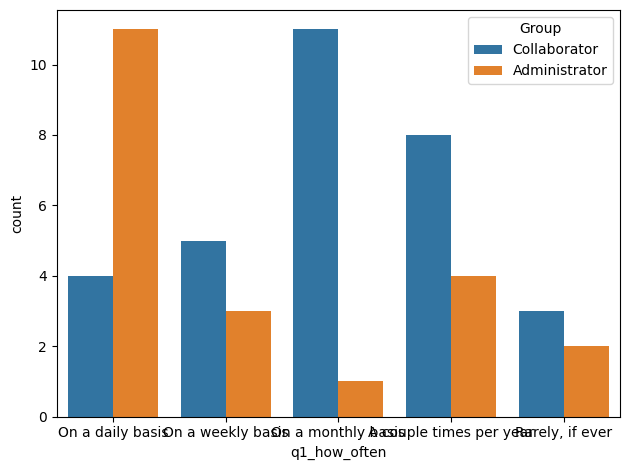

In [53]:
order = ["On a daily basis", "On a weekly basis", "On a monthly basis", "A couple times per year", "Rarely, if ever"]
df['q1_how_often'] = pd.Categorical(df['q1_how_often'], categories=order, ordered=True)

sns.countplot(data=df, x='q1_how_often', hue='Group', order=order)
plt.tight_layout()
plt.show()

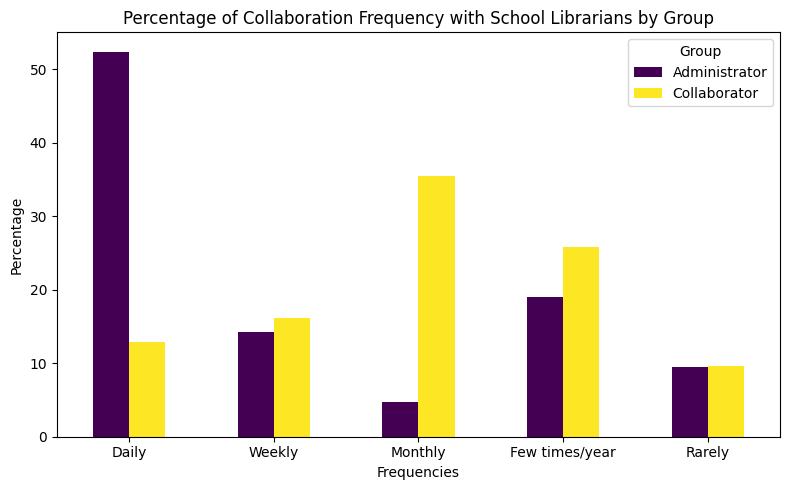

In [54]:
group_percentages = pd.crosstab(df['Group'], df['q1_how_often'], normalize='index') * 100
group_percentages = group_percentages[order]

group_percentages.T.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Percentage of Collaboration Frequency with School Librarians by Group')
plt.xlabel('Frequencies')
plt.xticks(rotation=0, ticks=range(len(order)), labels=["Daily", "Weekly", "Monthly", "Few times/year", "Rarely"])
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

- Over 50% of Administrators collaborate with school librarians daily, highlighting a high level of consistent interaction in their roles.

- Collaborators more often report monthly or occasional collaboration, suggesting their involvement tends to be project-based or periodic.

- A small portion of both groups rarely collaborate, indicating opportunities to strengthen ongoing engagement across all stakeholder roles.

`q3`: How familiar are you with the content of the National School Library Standards for Learners, School Librarians, and School Libraries?

In [55]:
pd.crosstab(df['Group'], df['q3_how_familiar'])

q3_how_familiar,Not at all familiar,Not too familiar,Somewhat familiar,Very familiar
Group,,,,
Administrator,1,3,8,6
Collaborator,8,7,5,3


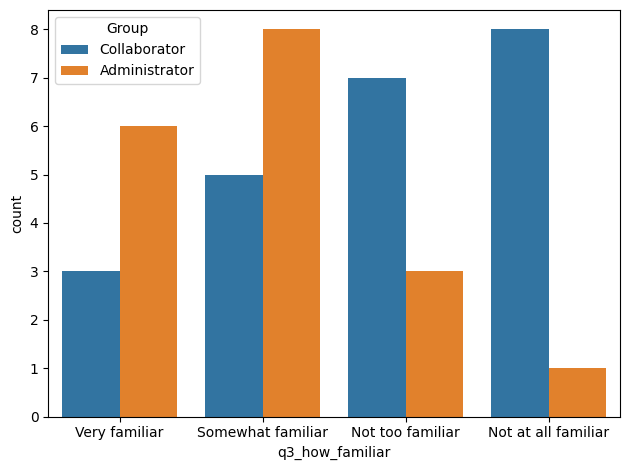

In [56]:
order = ["Very familiar", "Somewhat familiar", "Not too familiar", "Not at all familiar"]
df['q3_how_familiar'] = pd.Categorical(df['q3_how_familiar'], categories=order, ordered=True)

sns.countplot(data=df, x='q3_how_familiar', hue='Group', order=order)
plt.tight_layout()
plt.show()

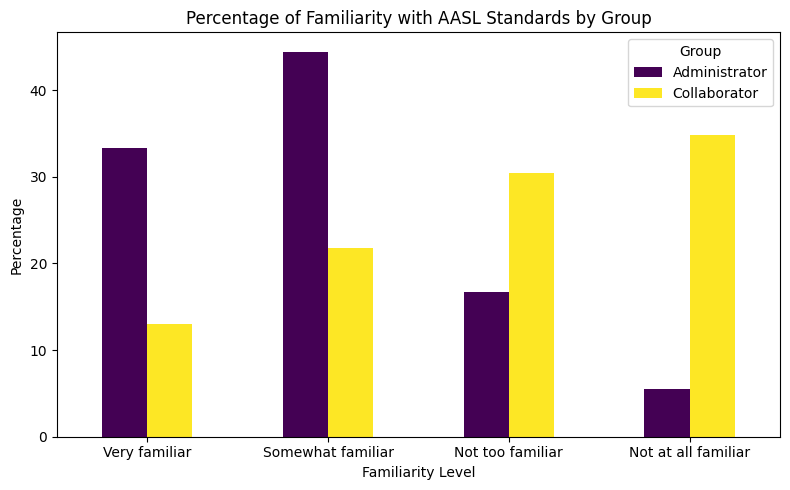

In [57]:
group_percentages = pd.crosstab(df['Group'], df['q3_how_familiar'], normalize='index') * 100
group_percentages = group_percentages[order]

group_percentages.T.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Percentage of Familiarity with AASL Standards by Group')
plt.xlabel('Familiarity Level')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

- Administrators reported higher familiarity overall, with most selecting 'Somewhat familiar' or 'Very familiar', reflecting moderate to strong engagement with the Standards.

- Collaborators showed significantly lower familiarity, with the majority selecting 'Not at all' or 'Not too familiar', indicating limited awareness or exposure.

- This gap suggests the need for increased communication and training efforts targeting Collaborators to boost understanding and usage of the Standards.

`q7`: How frequently do you use or refer to the National School Library Standards when working with your school librarian?

In [58]:
pd.crosstab(df['Group'], df['q7_refer_to_standards'])

q7_refer_to_standards,All the time,Never,Rarely,Sometimes
Group,,,,
Administrator,1,2,4,3
Collaborator,0,1,4,3


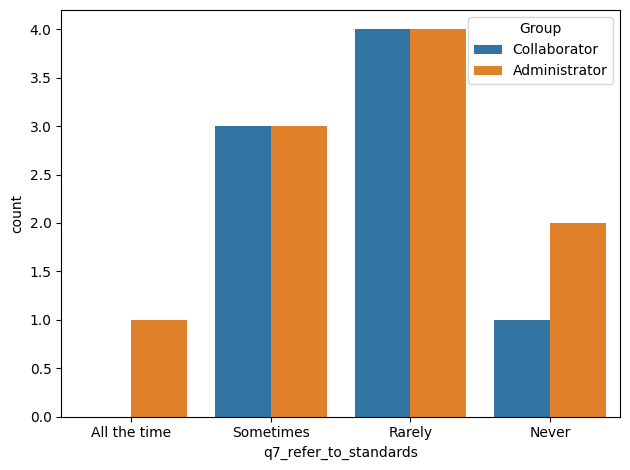

In [59]:
order = ["All the time", "Sometimes", "Rarely", "Never"]
df['q7_refer_to_standards'] = pd.Categorical(df['q7_refer_to_standards'], categories=order, ordered=True)

sns.countplot(data=df, x='q7_refer_to_standards', hue='Group', order=order)
plt.tight_layout()
plt.show()

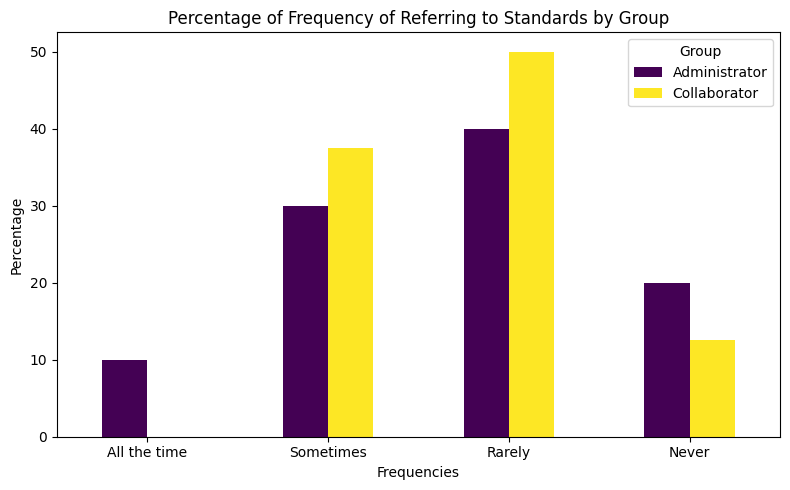

In [60]:
group_percentages = pd.crosstab(df['Group'], df['q7_refer_to_standards'], normalize='index') * 100
group_percentages = group_percentages[order]

group_percentages.T.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Percentage of Frequency of Referring to Standards by Group')
plt.xlabel('Frequencies')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

- Most stakeholders rarely or only sometimes refer to the Standards, indicating limited integration into collaborative work.

- Only one Administrator reported referring to the Standards 'All the time', and none among Collaborators, suggesting few consistent or embedded usage patterns.

- This pattern reflects a gap between general support for the Standards and their practical application, especially in routine decision-making or planning.

`q8`: How often do you consider each of the AASL Standards Shared Foundations when collaborating with your school librarian?

In [61]:
df_q8.iloc[:, 1:].astype(float).mean()

q8_inquire        2.666667
q8_include        2.500000
q8_collaborate    2.666667
q8_curate         2.833333
q8_explore        2.500000
q8_engage         2.500000
dtype: float64

In [62]:
counts = df_q8.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([3, 2, 1, 0], fill_value=0))
print(counts)

   q8_inquire  q8_include  q8_collaborate  q8_curate  q8_explore  q8_engage
3           4           4               4          5           3          3
2           2           1               2          1           3          3
1           0           1               0          0           0          0
0           0           0               0          0           0          0


- Stakeholders most frequently consider 'Curate', 'Inquire', and 'Collaborate', with these foundations receiving the highest average ratings and more 'All the time' responses.

- Other foundations like 'Include', 'Explore', and 'Engage' are considered less consistently, though still rated positively overall.

- This suggests that information management, inquiry, and teamwork are more embedded in collaborative practices than equity- or action-oriented elements of the Standards.

### Strength

`q4`: Overall, how would you rate the AASL National School Library Standards?

In [63]:
pd.crosstab(df['Group'], df['q4_rate'])

q4_rate,Excellent,Fair,Good
Group,,,
Administrator,4,4,6
Collaborator,2,0,6


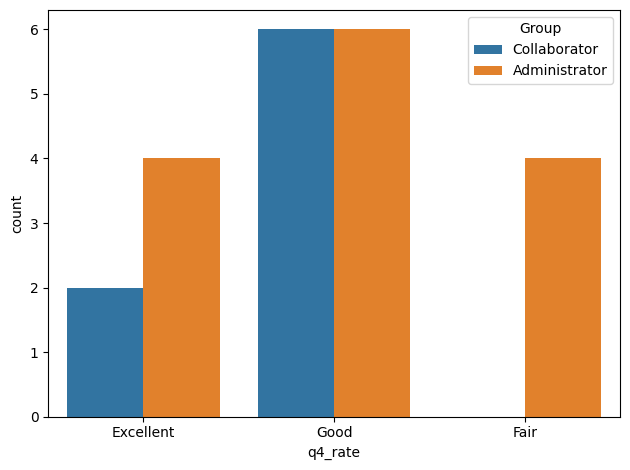

In [64]:
order = ["Excellent", "Good", "Fair"]
df['q4_rate'] = pd.Categorical(df['q4_rate'], categories=order, ordered=True)

sns.countplot(data=df, x='q4_rate', hue='Group', order=order)
plt.tight_layout()
plt.show()

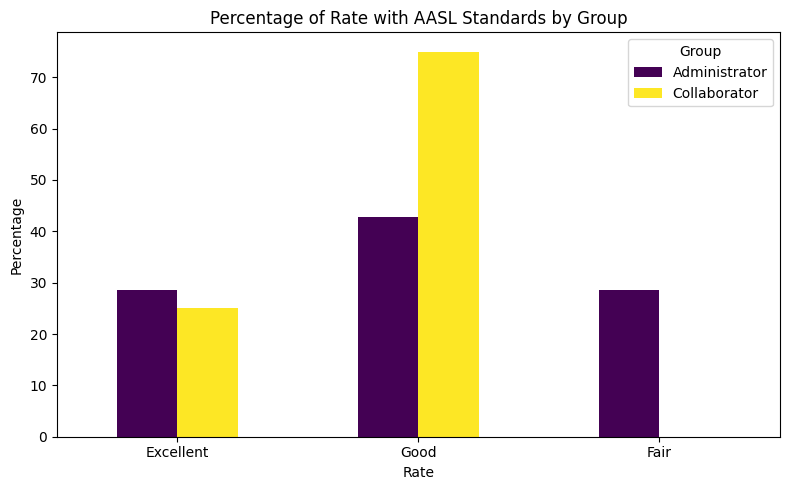

In [65]:
group_percentages = pd.crosstab(df['Group'], df['q4_rate'], normalize='index') * 100
group_percentages = group_percentages[order]

group_percentages.T.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Percentage of Rate with AASL Standards by Group')
plt.xlabel('Rate')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

- Most stakeholders rated the Standards as 'Good' or 'Excellent', with no Collaborators selecting 'Fair', indicating solid support and perceived value.

- Collaborators were more consistently positive, while Administrators showed a wider spread, including some 'Fair' ratings, suggesting more mixed experiences.

- Overall, the data reflects a generally favorable impression of the Standards, especially among those more familiar or actively engaged.

`q5`: Below is a list of words and phrases. Please indicate how well you think each word or phrase describes the National School Library Standards for Learners, School Librarians, and School Libraries.

In [66]:
df_q5.iloc[:, 1:].astype(float).mean()

q5_valuable              4.809524
q5_relevant              4.857143
q5_practical             4.238095
q5_useful                4.571429
q5_easy_to_use           4.285714
q5_easy_to_understand    4.428571
q5_well_written          4.714286
q5_nicely_designed       4.809524
q5_well_organized        4.380952
q5_ADA_accessible        4.380952
dtype: float64

In [67]:
counts = df_q5.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([6, 5, 4, 3, 2, 1, 0], fill_value=0))
print(counts)

   q5_valuable  q5_relevant  q5_practical  q5_useful  q5_easy_to_use  \
6            8            9             6          7               6   
5            5            3             4          3               5   
4            5            6             5          8               4   
3            2            3             3          1               3   
2            1            0             2          2               2   
1            0            0             0          0               0   
0            0            0             1          0               1   

   q5_easy_to_understand  q5_well_written  q5_nicely_designed  \
6                      6                8                  10   
5                      7                5                   3   
4                      3                4                   4   
3                      2                2                   2   
2                      2                2                   2   
1                      0         

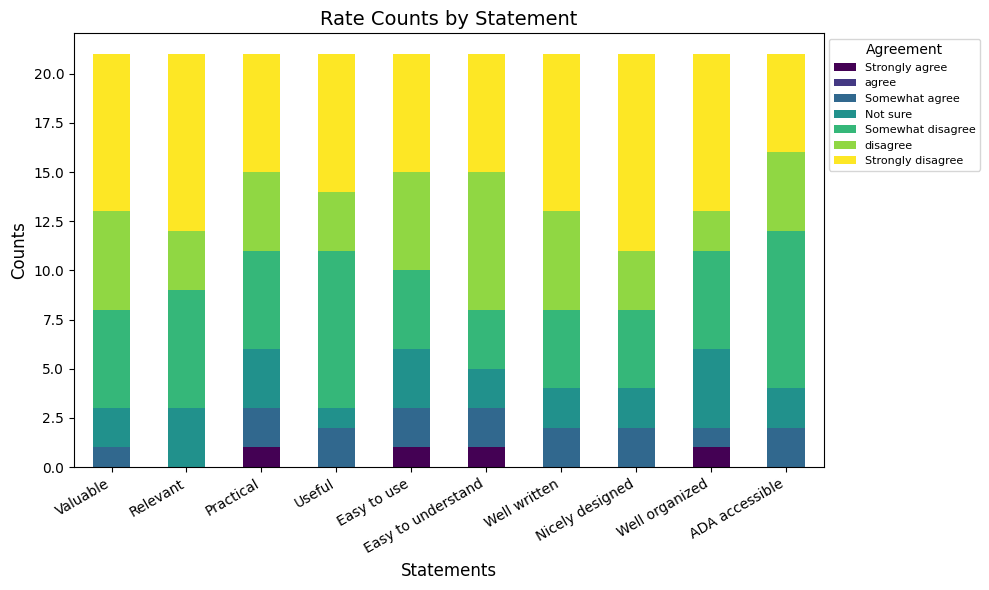

In [68]:
counts = df_q5.iloc[:, 1:].apply(lambda col: col.value_counts().reindex(range(7), fill_value=0))

# Rename
counts = counts.rename(columns={
    'q5_valuable': 'Valuable',
    'q5_relevant': 'Relevant',
    'q5_practical': 'Practical',
    'q5_useful': 'Useful',
    'q5_easy_to_use': 'Easy to use',
    'q5_easy_to_understand': 'Easy to understand',
    'q5_well_written': 'Well written',
    'q5_nicely_designed': 'Nicely designed',
    'q5_well_organized': 'Well organized',
    'q5_ADA_accessible': 'ADA accessible',
})
legend_labels = ['Strongly agree', 'agree', 'Somewhat agree', 'Not sure', 'Somewhat disagree', 'disagree', 'Strongly disagree']

counts.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Rate Counts by Statement', fontsize=14)
plt.xlabel('Statements', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.legend(title='Agreement', labels=legend_labels, bbox_to_anchor=(1, 1), fontsize=8)
plt.tight_layout()
plt.show()

- Stakeholders consistently rated the Standards as highly 'Relevant' (4.86) and 'Valuable' (4.81)—demonstrating broad agreement on their importance and usefulness.

- Positive impressions extended to the design and clarity, with 'Well-written' and 'Nicely designed' each receiving strong ratings (above 4.7).

- Ratings for 'Easy to use' and 'Easy to understand' were slightly lower, suggesting that while appreciated, the Standards can still feel complex to navigate.

- Overall, the data reflects a shared view that the Standards are well-constructed and meaningful, though some refinements could enhance usability.

`q9`: Overall, how would you rate AASL’s efforts to set and maintain up-to-date and practical standards and supporting resources?

In [69]:
pd.crosstab(df['Group'], df['q9_rate_support_materials'])

q9_rate_support_materials,Excellent,Fair,Good
Group,,,
Administrator,1,0,7
Collaborator,2,1,5


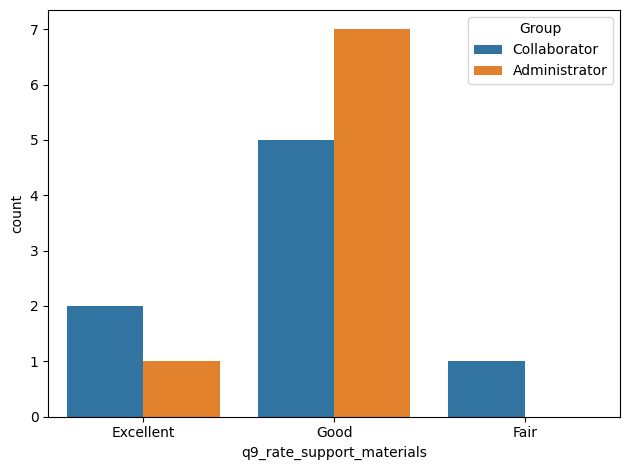

In [70]:
order = ["Excellent", "Good", "Fair"]
df['q9_rate_support_materials'] = pd.Categorical(df['q9_rate_support_materials'], categories=order, ordered=True)

sns.countplot(data=df, x='q9_rate_support_materials', hue='Group', order=order)
plt.tight_layout()
plt.show()

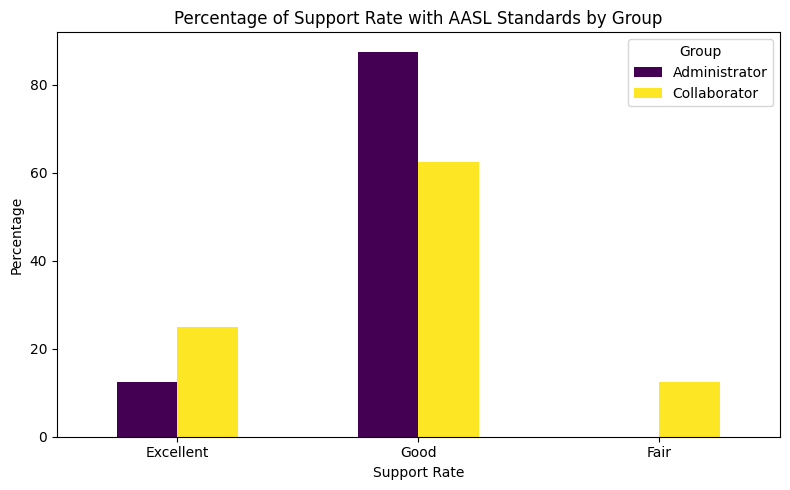

In [71]:
group_percentages = pd.crosstab(df['Group'], df['q9_rate_support_materials'], normalize='index') * 100
group_percentages = group_percentages[order]

group_percentages.T.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Percentage of Support Rate with AASL Standards by Group')
plt.xlabel('Support Rate')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

- Most stakeholders rated AASL’s efforts as 'Good', with particularly strong approval from Administrators (7 out of 8).

- Collaborators were slightly more divided, with one rating the efforts as 'Fair' and two selecting 'Excellent'.

- The results reflect general satisfaction with AASL’s support work, though some variation suggests potential to enhance usefulness or visibility of materials.

### Challenge

`q2`: What are the main reasons you do not work with or collaborate more often with the school librarian?

In [72]:
df_q2 = df.iloc[:, 2].dropna().tolist()
df_q2

['The librarian is not approachable.',
 'no time, heavy course work requirements',
 'time, meeting standards, and the librarian at my school is amazing I believe the reason comes more from lack of time from my side. ',
 'Not enough time!',
 'Time that I have to cover material keeps me from collaborating more. ',
 'Have a library of Reading Recovery books that already use.',
 'She is not willing ',
 'To help find books the kids are interested in when we are teaching our units',
 'I work with her on certain relevant projects',
 'time',
 'Our SLM is only in our building 2 days per week with no flexibility on those days.  This makes it difficult to collaborate on lessons.  We do send students for book check-out.',
 'I stay in communication with the librarians as needed, but as a district level supervisor I am tasked with numerous other responsibilities that dominate my work days.',
 'My role is to manage the affairs of all special education students and staff. Our paths just don’t cross as

- Time constraints were the most frequently cited barrier, especially among Collaborators. Many mentioned curriculum demands, scheduling issues, or limited librarian availability.

- A few respondents noted interpersonal or logistical obstacles, such as librarians being unapproachable or physically located on a different campus.

- Administrators highlighted role-based limitations, explaining that their responsibilities (e.g., district-level supervision or special education coordination) limit direct collaboration opportunities.

### Suggestion

`q6`: What are some things that could be done to better aid your collaboration with your school librarian to implement the National School Library Standards?

In [73]:
df_q6 = df.iloc[:, 15].dropna().tolist()
df_q6

['Increasing technology',
 'my program parameters do not allow me to sway from my content at times for us to collaborate more',
 "Better alignment with other standards. They would be better integrated into the classroom teacher's standards so that collaboration would be easier and everyone would feel like we are working toward the same end. Some librarian standards are unique but there is a lot of overlap that could be investigated and used to form bridges",
 'More days for her to work in the summer. This is a local contractual issue though. ',
 'Put them in a format that is printable, and easy to refer to.  Provide crosswalks with other national standards to make them easier for librarians to implement.',
 'Create standards that are detailed, specific, and descriptive at different grade levels.',
 'Pare them down.  The book is too long.  ',
 'More cross-walks with other standards (ELA, Math, Science, SS) like there is with ISTE.']

- Stakeholders emphasized the need for crosswalks between the AASL Standards and core content areas (e.g., ELA, Math, Science), to promote alignment and ease of integration into classroom instruction.

- Several comments called for simplified, printable, and grade-specific formats of the Standards, along with more concise documentation to make them easier to use in day-to-day planning.

- Suggestions also touched on structural or local barriers, such as limited summer availability for librarians or rigid instructional programs that restrict collaboration time.